# Using LinearRegression Model Predict Salary base on experience/testscore/interviewscore

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df=pd.read_csv(r"C:\Users\raidi\OneDrive\Desktop\Python\Datasets\hiring.csv")

In [112]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


# Check size,shape,datatypes

In [113]:
df.shape

(8, 4)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


# Check Na first in all features

In [115]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

# Convert obj to int(world to number incase of experience)

In [116]:
import math
from word2number import w2n

In [117]:
df.experience.fillna("zero",inplace=True)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [118]:
df.experience=df.experience.astype(str)
df.experience=df.experience.apply(w2n.word_to_num)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


# Fillna

In [119]:
df["test_score(out of 10)"]=df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].mean())

In [120]:
df.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


# Check realtionship among features

Text(0, 0.5, 'Salary')

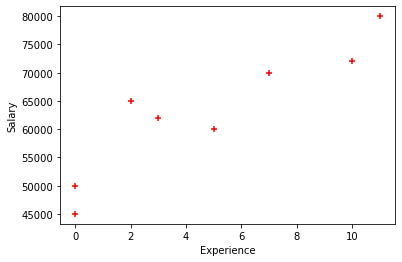

In [121]:
plt.scatter(df["experience"],df["salary($)"],color="red",marker="+")
plt.xlabel("Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

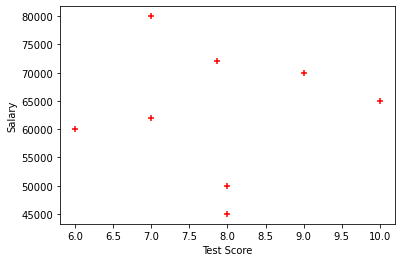

In [122]:
plt.scatter(df["test_score(out of 10)"],df["salary($)"],color="red",marker="+")
plt.xlabel("Test Score")
plt.ylabel("Salary")

In [123]:
df[df["test_score(out of 10)"]==7]

,experience,test_score(out of 10),interview_score(out of 10),salary($)
5,3,7.0,10,62000
7,11,7.0,8,80000


In [124]:
X=df.drop("salary($)",axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [125]:
y=df['salary($)'].values
y

array([50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000],
      dtype=int64)

# Create Model and Predict salary base on experience,test score and interview score

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
lr_model=LinearRegression()

In [128]:
lr_model.fit(X,y)

LinearRegression()

In [129]:
lr_model.score(X,y)

0.9639958361860578

In [130]:
lr_model.intercept_

17237.330313727172

In [131]:
lr_model.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [132]:
lr_model.predict([[2,9,6]])

array([53290.89255945])

In [133]:
lr_model.predict([[12,10,10]])

array([92268.07227784])